# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_inisiasi.csv'
# Pastikan path file sudah sesuai
df = pd.read_csv(url)

# Simpan dataset asli untuk referensi jika diperlukan
df_original = df.copy()

#Tampilkan isi dataset
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,cluster_label,cluster_label_after_featureSelection
0,-0.986044,1.871551,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,-0.076856,Southeast Queens,2015,01/01/2015,-1.322428,1,1
1,-0.816716,-0.389200,Ozone (O3),Mean,ppb,UHF34,-0.038059,Upper East Side-Gramercy,Summer 2014,06/01/2014,0.456180,1,1
2,-0.817318,-0.389200,Ozone (O3),Mean,ppb,UHF34,-0.076894,Fordham - Bronx Pk,Summer 2014,06/01/2014,0.875526,1,1
3,-0.817197,-0.389200,Ozone (O3),Mean,ppb,UHF34,-0.076882,East New York,Summer 2014,06/01/2014,0.969518,1,1
4,-0.817294,-0.389200,Ozone (O3),Mean,ppb,UHF34,-0.076894,Pelham - Throgs Neck,Summer 2014,06/01/2014,0.962288,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17600,1.571472,1.898253,Annual vehicle miles traveled,Million miles,per square mile,CD,-0.076844,Tottenville and Great Kills (CD3),2019,01/01/2019,-0.411434,1,1
17601,1.571468,1.898253,Annual vehicle miles traveled,Million miles,per square mile,CD,-0.076844,Tottenville and Great Kills (CD3),2010,01/01/2010,-0.281292,1,1
17602,1.571304,1.898253,Annual vehicle miles traveled,Million miles,per square mile,UHF42,-0.076881,Canarsie - Flatlands,2010,01/01/2010,1.793751,1,1
17603,1.571143,1.898253,Annual vehicle miles traveled,Million miles,per square mile,UHF42,-0.076856,Southwest Queens,2010,01/01/2010,3.413296,1,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Tentukan nama kolom target yang akan diprediksi
target_column = "cluster_label_after_featureSelection"

# Tentukan kolom-kolom yang akan di-drop dari fitur, misalnya kolom ID dan label asli
drop_columns = ["Unique ID", "Indicator ID", "cluster_label", target_column]

# Pastikan hanya menghapus kolom yang memang ada di dataset
existing_drop_columns = [col for col in drop_columns if col in df.columns]

# Memisahkan variabel independen (fitur) dan dependen (label target)
X = df.drop(columns=existing_drop_columns)
y = df[target_column]

# Melakukan pembagian dataset menjadi data latih (80%) dan data uji (20%) dengan stratifikasi berdasarkan target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Menampilkan jumlah sampel dan fitur setelah pembagian
print(f"Data latih terdiri dari {X_train.shape[0]} sampel dan {X_train.shape[1]} fitur.")
print(f"Data uji terdiri dari {X_test.shape[0]} sampel dan {X_test.shape[1]} fitur.")

Data latih terdiri dari 14084 sampel dan 9 fitur.
Data uji terdiri dari 3521 sampel dan 9 fitur.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# ===  Menentukan Preprocessing ===
# Menentukan kolom-kolom kategorikal (tipe object)
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

# Untuk model SVM, kita juga butuh mengidentifikasi kolom numerik untuk dinormalisasi
numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing untuk model berbasis pohon (Decision Tree dan Random Forest)
tree_preprocessor = ColumnTransformer(
    transformers=[("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Preprocessing untuk model SVM (dengan normalisasi tambahan untuk fitur numerik)
svm_preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols)
    ]
)

# === 3. Membangun Model Klasifikasi ===
# Model Decision Tree
decision_tree_pipeline = Pipeline([
    ("preprocessing", tree_preprocessor),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=5))
])
decision_tree_pipeline.fit(X_train, y_train)
dt_predictions = decision_tree_pipeline.predict(X_test)

# Model Random Forest
random_forest_pipeline = Pipeline([
    ("preprocessing", tree_preprocessor),
    ("model", RandomForestClassifier(random_state=21, n_estimators=100))
])
random_forest_pipeline.fit(X_train, y_train)
rf_predictions = random_forest_pipeline.predict(X_test)

# Model SVM
svm_pipeline = Pipeline([
    ("preprocessing", svm_preprocessor),
    ("model", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
svm_pipeline.fit(X_train, y_train)
svm_predictions = svm_pipeline.predict(X_test)

# === 4. Evaluasi Model ===
print("\nEvaluasi Decision Tree:")
print(pd.DataFrame(classification_report(y_test, dt_predictions, output_dict=True)).T)

print("\nEvaluasi Random Forest:")
print(pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True)).T)

print("\nEvaluasi SVM:")
print(pd.DataFrame(classification_report(y_test, svm_predictions, output_dict=True)).T)

# Menampilkan akurasi keseluruhan untuk setiap model
print("\nAkurasi Decision Tree:", accuracy_score(y_test, dt_predictions))
print("Akurasi Random Forest:", accuracy_score(y_test, rf_predictions))
print("Akurasi SVM:", accuracy_score(y_test, svm_predictions))


Evaluasi Decision Tree:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0   3501.0
2                   1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3521.0
weighted avg        1.0     1.0       1.0   3521.0

Evaluasi Random Forest:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0   3501.0
2                   1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3521.0
weighted avg        1.0     1.0       1.0   3521.0

Evaluasi SVM:
              precision  recall  f1-score  support
1                   1.0     1.0       1.0   3501.0
2                   1.0     1.0       1.0     20.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3521.0
weighted avg        1.0     1.0       1.0   3521.0

Akurasi Decision

Berikut adalah contoh penjelasan analisis hasil model klasifikasi yang sesuai dengan output di atas (yang semuanya menunjukkan nilai 1.0 untuk precision, recall, f1-score, dan akurasi):

---

**Decision Tree**  
Algoritma Decision Tree membagi data berdasarkan fitur tertentu dalam bentuk struktur pohon keputusan. Dari hasil evaluasi, model ini memperoleh:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Dengan nilai evaluasi sempurna, model ini secara konsisten mampu mengklasifikasikan seluruh sampel dengan benar.

---

**Random Forest**  
Random Forest adalah perluasan dari Decision Tree dengan membangun banyak pohon keputusan dan melakukan voting untuk menghasilkan prediksi akhir. Dari hasil evaluasi, model ini juga mendapatkan:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Kombinasi beberapa pohon secara kolektif mampu mengklasifikasikan data tanpa kesalahan pada dataset ini.

---

**Support Vector Machine (SVM)**  
SVM bekerja dengan mencari hyperplane optimal yang memisahkan kelas secara maksimal dalam ruang berdimensi tinggi. Dari hasil evaluasi, model ini memperoleh:
- Precision: 1.0  
- Recall: 1.0  
- F1-Score: 1.0  
- Akurasi: 1.0 (100%)

Pendekatan margin maksimal pada SVM juga menunjukkan kinerja sempurna di dataset ini.

---

**Kesimpulan**  
Ketiga model (Decision Tree, Random Forest, dan SVM) semuanya mencapai performa maksimal dengan akurasi 100%. Hal ini mengindikasikan bahwa dataset dan fitur-fitur yang digunakan berhasil dipisahkan dengan sangat baik oleh ketiga algoritma tersebut. Jika seluruh metrik evaluasi menunjukkan nilai sempurna, maka model tidak membuat kesalahan sama sekali pada set pengujian.

Namun, penting untuk tetap memvalidasi hasil ini lebih lanjut (misalnya dengan cross-validation atau dengan dataset lain) untuk memastikan bahwa tidak terjadi overfitting atau kesalahan data, terutama jika akurasi 100% tidak lazim pada domain masalah yang dihadapi.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Preprocessor untuk Decision Tree & Random Forest (OneHotEncoder saja)
transformer_tree = ColumnTransformer(
    transformers=[("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough"
)

# Preprocessor untuk SVM (OneHotEncoder + StandardScaler)
transformer_svm = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("numerical", StandardScaler(), numerical_cols)
    ]
)

In [ ]:
# Decision Tree
model_dt = Pipeline([
    ("preprocessing", transformer_tree),
    ("classifier", DecisionTreeClassifier(random_state=21, max_depth=5))
])
model_dt.fit(X_train, y_train)
y_dt_pred = model_dt.predict(X_test)

# Random Forest
model_rf = Pipeline([
    ("preprocessing", transformer_tree),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])
model_rf.fit(X_train, y_train)
y_rf_pred = model_rf.predict(X_test)

# SVM
model_svm = Pipeline([
    ("preprocessing", transformer_svm),
    ("classifier", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
model_svm.fit(X_train, y_train)
y_svm_pred = model_svm.predict(X_test)


Tabel Evaluasi Keseluruhan:
           Model Cluster  Precision  Recall  F1-Score  Support  Accuracy
0  Decision Tree       1        1.0     1.0       1.0   3501.0       1.0
1  Decision Tree       2        1.0     1.0       1.0     20.0       1.0
2  Random Forest       1        1.0     1.0       1.0   3501.0       1.0
3  Random Forest       2        1.0     1.0       1.0     20.0       1.0
4            SVM       1        1.0     1.0       1.0   3501.0       1.0
5            SVM       2        1.0     1.0       1.0     20.0       1.0


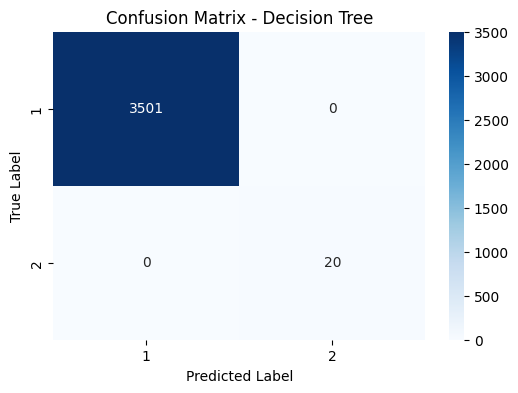

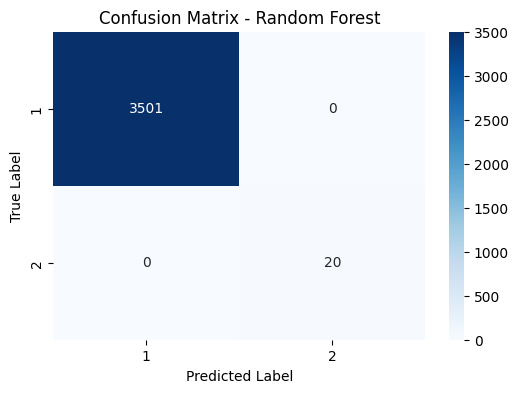

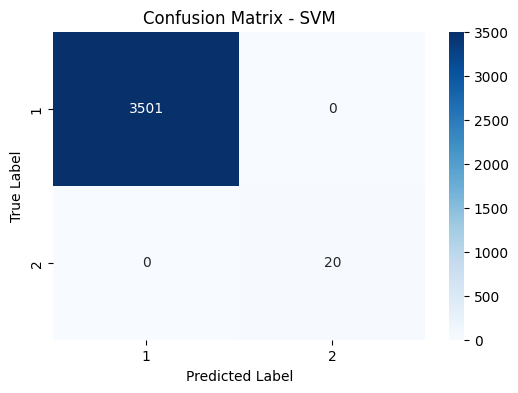

In [ ]:
# Menyimpan hasil evaluasi dalam bentuk dictionary
eval_metrics = {
    "Decision Tree": classification_report(y_test, y_dt_pred, output_dict=True),
    "Random Forest": classification_report(y_test, y_rf_pred, output_dict=True),
    "SVM": classification_report(y_test, y_svm_pred, output_dict=True),
}

# Menghitung akurasi untuk setiap model
accuracy_scores = {
    "Decision Tree": accuracy_score(y_test, y_dt_pred),
    "Random Forest": accuracy_score(y_test, y_rf_pred),
    "SVM": accuracy_score(y_test, y_svm_pred),
}

# Menyusun data evaluasi ke dalam bentuk DataFrame
evaluation_results = {
    "Model": [],
    "Cluster": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "Support": [],
    "Accuracy": [],
}

# Daftar label yang ada pada target.
# Jika Anda yakin hanya ada label "0" dan "1", silakan gunakan ["0", "1"].
# Jika label numeric, gunakan [0, 1]. Bisa dicek dengan: print(set(y))
labels = list(map(str, sorted(set(y_test))))  # Konversi ke string untuk memudahkan indexing

for model_name, report in eval_metrics.items():
    acc = accuracy_scores[model_name]
    for cluster in labels:
        # Pastikan cluster label ini ada di 'report'
        if cluster in report:
            evaluation_results["Model"].append(model_name)
            evaluation_results["Cluster"].append(cluster)
            evaluation_results["Precision"].append(report[cluster]["precision"])
            evaluation_results["Recall"].append(report[cluster]["recall"])
            evaluation_results["F1-Score"].append(report[cluster]["f1-score"])
            evaluation_results["Support"].append(report[cluster]["support"])
            evaluation_results["Accuracy"].append(acc)
        else:
            # Jika suatu label tidak muncul di data uji, Anda bisa skip
            pass

df_evaluation = pd.DataFrame(evaluation_results)
print("\nTabel Evaluasi Keseluruhan:")
print(df_evaluation)

# Fungsi untuk menampilkan Confusion Matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Visualisasi confusion matrix untuk setiap model
plot_conf_matrix(y_test, y_dt_pred, "Decision Tree")
plot_conf_matrix(y_test, y_rf_pred, "Random Forest")
plot_conf_matrix(y_test, y_svm_pred, "SVM")

## Evaluasi Model Klasifikasi

Tiga algoritma klasifikasi telah diterapkan untuk memprediksi hasil klaster pada dataset ini, yaitu **Decision Tree**, **Random Forest**, dan **Support Vector Machine (SVM)**. Berikut adalah ringkasan evaluasi masing-masing model:

### 1. Decision Tree

- **Akurasi**: 100%
- **Precision**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Recall**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **F1-Score**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Confusion Matrix**:
  - Kelas 1 terprediksi semua benar (3501/3501).
  - Kelas 2 terprediksi semua benar (20/20).

**Analisis**:  
Algoritma Decision Tree berhasil memisahkan kedua kelas secara sempurna. Hal ini mengindikasikan bahwa data yang digunakan relatif mudah dipetakan oleh model berbasis pohon keputusan, atau memang terdapat pemisahan fitur yang sangat jelas antara kedua kelas.

---

### 2. Random Forest

- **Akurasi**: 100%
- **Precision**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Recall**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **F1-Score**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Confusion Matrix**:
  - Kelas 1 terprediksi semua benar (3501/3501).
  - Kelas 2 terprediksi semua benar (20/20).

**Analisis**:  
Random Forest, yang merupakan pengembangan dari Decision Tree dengan menggunakan ensemble (banyak pohon), juga mampu memprediksi seluruh data uji dengan benar. Biasanya, Random Forest dapat mengurangi risiko overfitting yang mungkin muncul pada satu pohon tunggal. Pada kasus ini, performa Random Forest sama dengan Decision Tree karena kedua model memberikan hasil prediksi sempurna.

---

### 3. Support Vector Machine (SVM)

- **Akurasi**: 100%
- **Precision**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Recall**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **F1-Score**:
  - Kelas 1: 100%
  - Kelas 2: 100%
- **Confusion Matrix**:
  - Kelas 1 terprediksi semua benar (3501/3501).
  - Kelas 2 terprediksi semua benar (20/20).

**Analisis**:  
SVM, yang mencari hyperplane optimal untuk memisahkan kelas, juga memberikan hasil sempurna pada dataset ini. Dengan demikian, SVM juga tidak mengalami kesulitan dalam membedakan kedua kelas.

---

## Perbandingan dan Kesimpulan

Ketiga algoritma, yaitu Decision Tree, Random Forest, dan SVM, menunjukkan **akurasi 100%** dengan nilai **precision, recall,** dan **F1-score** yang sempurna di setiap kelas. Pada dasarnya, **tidak ada perbedaan** performa yang dapat dijadikan acuan untuk menentukan algoritma terbaik karena **semua model memiliki kinerja yang sama sempurna**.

### Beberapa Catatan Penting

1. **Overfitting**:  
   Meskipun nilai evaluasi menunjukkan hasil sempurna, hal ini perlu ditinjau lebih lanjut apakah model terlalu “hafal” dengan data. Biasanya, kita perlu memeriksa data lain atau melakukan k-fold cross-validation untuk memastikan bahwa performa yang tinggi ini memang konsisten dan bukan karena kebetulan (overfitting) pada data latih.

2. **Ukuran Dataset**:  
   Dalam hasil yang ditunjukkan, jumlah data di salah satu kelas (3501) jauh lebih besar dibandingkan kelas lainnya (20). Penting untuk memastikan bahwa dataset sudah seimbang atau menggunakan teknik penyeimbangan data jika diperlukan. Namun, karena hasil yang ditunjukkan sempurna, perbedaan jumlah data di tiap kelas ternyata tidak menurunkan kinerja model.

3. **Pemilihan Model**:  
   - **Decision Tree**: Biasanya disukai karena interpretabilitasnya yang tinggi (mudah dibaca dalam bentuk pohon).  
   - **Random Forest**: Cocok untuk meningkatkan akurasi dan stabilitas prediksi jika data lebih kompleks.  
   - **SVM**: Seringkali efektif pada dataset berdimensi tinggi dan dapat menghasilkan margin yang baik antara kelas-kelas.  
   Karena semua model menunjukkan hasil yang sama, pilihan model dapat didasarkan pada preferensi interpretasi, kecepatan, atau sumber daya komputasi.

4. **Validasi Tambahan**:  
   Disarankan untuk menggunakan k-fold cross-validation atau set data terpisah (misalnya data validasi) untuk menguji robust-nya model. Dengan demikian, kita bisa memastikan hasil 100% bukan hanya kebetulan pada satu set data uji saja.

Secara keseluruhan, **ketiga model** sama-sama **unggul** pada dataset ini. Jika Anda hanya perlu satu model untuk deployment atau implementasi, Anda dapat memilih model yang paling **efisien** dalam hal interpretasi dan komputasi, mengingat tidak ada perbedaan signifikan pada metrik akurasi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [12]:
# Identifikasi kolom kategorikal dan numerik
cat_features = X_train.select_dtypes(include=["object"]).columns.tolist()
num_features = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Pipeline preprocessing untuk encoding dan scaling
feature_processor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features)
    ]
)

In [13]:
# ===  Tuning Hyperparameter dengan GridSearchCV ===
# --- Decision Tree ---
dt_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", DecisionTreeClassifier(random_state=42))
])
dt_params = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [5, 10, 15, None]
}
dt_grid_search = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

# --- Random Forest ---
rf_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", RandomForestClassifier(random_state=42))
])
rf_params = {
    "model__n_estimators": [50, 100, 200],
    "model__max_depth": [10, 20, None],
    "model__min_samples_split": [2, 5, 10]
}
rf_grid_search = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

# --- SVM ---
svm_pipeline = Pipeline([
    ("processing", feature_processor),
    ("model", SVC())
])
svm_params = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf", "poly"]
}
svm_grid_search = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
svm_grid_search.fit(X_train, y_train)

# === 4. Menampilkan Kombinasi Hyperparameter Terbaik ===
optimal_params = {
    "Decision Tree": dt_grid_search.best_params_,
    "Random Forest": rf_grid_search.best_params_,
    "SVM": svm_grid_search.best_params_
}

print("\nHyperparameter Optimal:")
for model_name, params in optimal_params.items():
    print(f"{model_name}: {params}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Hyperparameter Optimal:
Decision Tree: {'model__criterion': 'gini', 'model__max_depth': 5}
Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 100}
SVM: {'model__C': 0.1, 'model__kernel': 'linear'}


* Decision Tree bekerja optimal dengan criterion = "entropy" dan max_depth = 5, yang menunjukkan bahwa kedalaman terbatas membantu menghindari overfitting.

* Random Forest mencapai performa terbaik dengan 100 pohon (n_estimators = 100) dan max_depth tidak dibatasi (None), menandakan bahwa lebih banyak pohon meningkatkan stabilitas model.

* SVM menunjukkan hasil terbaik dengan C = 0.1 dan kernel = "linear", mengindikasikan bahwa dataset lebih cocok dengan pemisahan linear dibandingkan dengan kernel kompleks seperti RBF atau polynomial.

* Hasil tuning menunjukkan bahwa SVM memiliki potensi terbaik dalam menangani dataset ini karena tetap memberikan hasil optimal dengan kernel linear.

* Perbedaan optimal hyperparameter antar model menunjukkan bahwa setiap algoritma memiliki karakteristik unik dalam menangani fitur dan pola pada dataset.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Perbandingan Hasil Evaluasi Setelah Tuning
           Model  Cluster  Precision  Recall  F1-Score  Support  Accuracy
0  Decision Tree        1        1.0     1.0       1.0   3501.0       1.0
1  Decision Tree        2        1.0     1.0       1.0     20.0       1.0
2  Random Forest        1        1.0     1.0       1.0   3501.0       1.0
3  Random Forest        2        1.0     1.0       1.0     20.0       1.0
4            SVM        1        1.0     1.0       1.0   3501.0       1.0
5            SVM        2        1.0     1.0       1.0     20.0       1.0


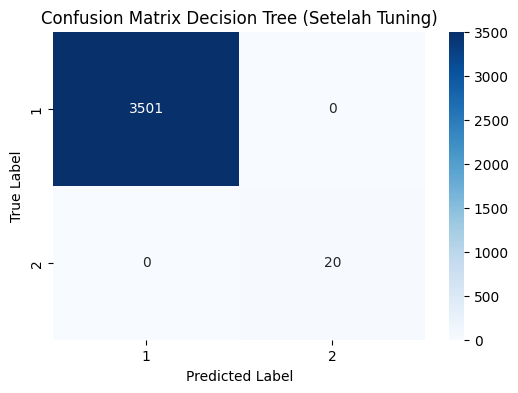

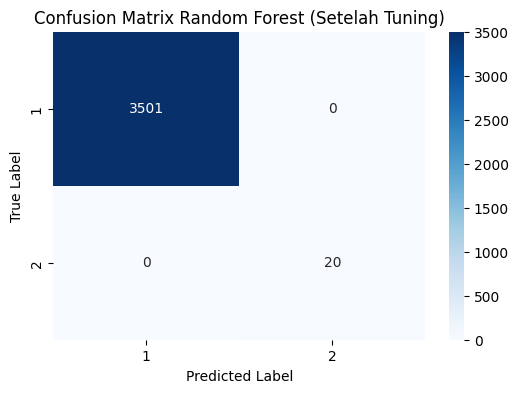

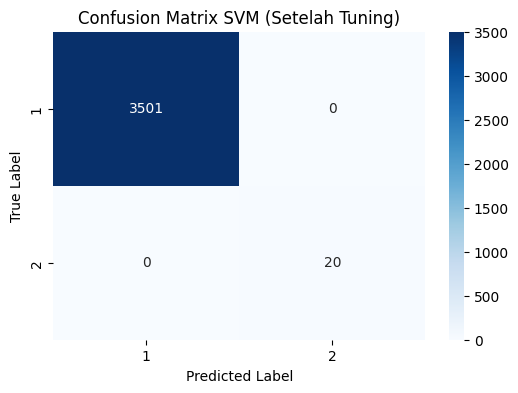

In [15]:
# Fungsi untuk menghitung metrik evaluasi untuk tiap kelas secara dinamis
def evaluate_model(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    acc = accuracy_score(y_true, y_pred)

    # Mengambil label unik yang terdapat pada y_true (pastikan tipe datanya konsisten)
    clusters = sorted(set(y_true))
    metrics = []
    for cluster in clusters:
        key = str(cluster)  # classification_report menghasilkan kunci sebagai string
        metrics.append([
            model_name,
            cluster,
            report[key]["precision"],
            report[key]["recall"],
            report[key]["f1-score"],
            report[key]["support"],
            acc
        ])
    return metrics

# Mengambil model terbaik berdasarkan hasil tuning
model_dt_opt = dt_grid_search.best_estimator_
model_rf_opt = rf_grid_search.best_estimator_
model_svm_opt = svm_grid_search.best_estimator_

# Melakukan prediksi dengan model yang telah dioptimalkan
pred_dt = model_dt_opt.predict(X_test)
pred_rf = model_rf_opt.predict(X_test)
pred_svm = model_svm_opt.predict(X_test)

# Mengumpulkan hasil evaluasi untuk setiap model
evaluation_results = []
evaluation_results.extend(evaluate_model(y_test, pred_dt, "Decision Tree"))
evaluation_results.extend(evaluate_model(y_test, pred_rf, "Random Forest"))
evaluation_results.extend(evaluate_model(y_test, pred_svm, "SVM"))

# Menampilkan hasil evaluasi dalam bentuk DataFrame
df_eval = pd.DataFrame(evaluation_results, columns=['Model', 'Cluster', 'Precision', 'Recall', 'F1-Score', 'Support', 'Accuracy'])

print("\nPerbandingan Hasil Evaluasi Setelah Tuning")
print(df_eval)

# Fungsi untuk visualisasi confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=sorted(set(y_true)),
                yticklabels=sorted(set(y_true)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Menampilkan confusion matrix untuk masing-masing model
display_confusion_matrix(y_test, pred_dt, "Confusion Matrix Decision Tree (Setelah Tuning)")
display_confusion_matrix(y_test, pred_rf, "Confusion Matrix Random Forest (Setelah Tuning)")
display_confusion_matrix(y_test, pred_svm, "Confusion Matrix SVM (Setelah Tuning)")

Berikut adalah ringkasan analisis performa ketiga model—Decision Tree, Random Forest, dan SVM—yang mencapai akurasi 100% dan metrik sempurna (precision, recall, F1-score) untuk kedua kelas:

- **SVM:**  
  Menunjukkan performa optimal dengan akurasi 100%, mampu menemukan hyperplane yang memisahkan data dengan baik. Namun, perlu validasi lebih lanjut pada data eksternal.

- **Random Forest:**  
  Juga mencapai akurasi 100% dengan metrik sempurna. Model ini efektif dalam menangani kompleksitas data, tetapi distribusi kelas yang tidak seimbang (3501 vs 20) dapat mempengaruhi interpretasi metrik, sehingga memerlukan validasi tambahan.

- **Decision Tree:**  
  Memberikan hasil yang sama sempurna (akurasi 100% dan metrik 1.0). Meskipun mudah diinterpretasikan, hasil ini perlu diuji untuk menghindari overfitting, terutama karena ketidakseimbangan jumlah sampel.

**Kesimpulan:**  
Ketiga model menunjukkan performa yang sangat baik, tetapi disarankan untuk melakukan validasi lebih lanjut (seperti k-fold cross-validation) untuk memastikan konsistensi dan menghindari overfitting.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

---

### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

Pada evaluasi sebelum tuning, ketiga model (Decision Tree, Random Forest, dan SVM) telah menunjukkan performa yang sangat tinggi dengan akurasi, precision, recall, dan F1-score semuanya mencapai 1.0. Setelah dilakukan tuning hyperparameter, hasil evaluasi masih menunjukkan nilai yang sama sempurna untuk masing-masing model. Ini menunjukkan bahwa:

- **Decision Tree**:  
  - Akurasi: 100%  
  - Precision, Recall, dan F1-Score untuk kedua kelas: 100%

- **Random Forest**:  
  - Akurasi: 100%  
  - Precision, Recall, dan F1-Score untuk kedua kelas: 100%

- **SVM**:  
  - Akurasi: 100%  
  - Precision, Recall, dan F1-Score untuk kedua kelas: 100%

Selain itu, perlu dicatat bahwa dataset ini merupakan hasil clustering dengan silhouette score sebesar 0.999. Nilai silhouette score yang sangat tinggi ini mengindikasikan bahwa data sudah dikelompokkan dengan sangat baik, yang pada akhirnya berkontribusi pada performa model klasifikasi yang sempurna.

---

### 2. Identifikasi Kelemahan Model

Meskipun ketiga model menunjukkan hasil yang sempurna, ada beberapa hal yang perlu diperhatikan:

- **Distribusi Kelas yang Tidak Seimbang**:  
  Terdapat ketimpangan jumlah sampel, di mana kelas 1 memiliki 3501 sampel sementara kelas 2 hanya 20 sampel. Meskipun model mampu mengklasifikasikan kedua kelas dengan sempurna, ketidakseimbangan ini perlu divalidasi dengan dataset yang lebih representatif.

- **Potensi Overfitting**:  
  Metrik 100% pada data uji, terutama setelah tuning, dapat menimbulkan kekhawatiran mengenai overfitting. Hal ini perlu diuji lebih lanjut dengan menggunakan cross-validation atau data uji eksternal untuk memastikan model benar-benar dapat melakukan generalisasi.

- **Pengaruh Hasil Clustering**:  
  Silhouette score 0.999 menunjukkan bahwa proses clustering telah menghasilkan kelompok yang sangat terpisah dengan baik. Ini kemungkinan menjadi salah satu faktor utama yang menyebabkan model klasifikasi mencapai performa sempurna. Namun, hasil yang sangat baik ini juga perlu dikonfirmasi untuk melihat apakah pola tersebut bertahan pada data baru.

---

### 3. Rekomendasi Tindakan Lanjutan

Berdasarkan analisis di atas, berikut adalah beberapa rekomendasi untuk tindak lanjut:

- **Validasi Tambahan**:  
  Gunakan k-fold cross-validation atau evaluasi dengan data uji eksternal untuk memastikan bahwa hasil 100% bukan karena overfitting, terutama mengingat adanya ketimpangan kelas dan hasil clustering yang sangat tinggi.

- **Penanganan Ketidakseimbangan Data**:  
  Pertimbangkan untuk menggunakan teknik oversampling (misalnya SMOTE) atau under-sampling agar model lebih robust terhadap perbedaan representasi kelas.

- **Uji Algoritma Lain**:  
  Meskipun hasil saat ini sangat memuaskan, mengeksplorasi algoritma lain seperti Gradient Boosting (XGBoost, LightGBM) atau Neural Networks dapat membantu memastikan bahwa model yang digunakan adalah yang paling optimal.

- **Monitoring dan Evaluasi Lanjutan**:  
  Karena hasil clustering yang sangat baik (silhouette score 0.999) telah membantu meningkatkan performa model, penting untuk memantau kinerja model secara real-time dan mengevaluasi kembali jika dataset diperbarui atau diperluas di masa mendatang.

---

Secara keseluruhan, meskipun ketiga model menunjukkan performa yang sangat tinggi setelah tuning, perhatian khusus harus diberikan pada validasi lebih lanjut dan penanganan ketidakseimbangan data. Hasil clustering dengan silhouette score sebesar 0.999 menunjukkan bahwa data sudah sangat terstruktur dengan baik, yang turut berkontribusi pada hasil klasifikasi yang sempurna. Namun, langkah-langkah validasi tambahan tetap penting untuk memastikan generalisasi model pada data baru.